Problem statement:

An automobile parts manufacturing company has collected data of transactions for 3 years. They do not have any in-house data science team, thus they have hired you as their consultant. Your job is to use your magical data science skills to provide them with suitable insights about their data and their customers.

Auto Sales Data: Sales_Data.xlsx

In [64]:
from google.colab import files
uploaded = files.upload()

Saving Sales_Data.xlsx to Sales_Data.xlsx


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import warnings 
warnings.filterwarnings( "ignore")

In [66]:
df = pd.read_excel("Sales_Data.xlsx")

Data Analysis

In [67]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [68]:
df.shape

(2747, 20)

In [69]:
print("The no. of rows: ",df.shape[0], "\n""The no. of columns: ",df.shape[1])

The no. of rows:  2747 
The no. of columns:  20


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [71]:
df.dtypes

ORDERNUMBER                      int64
QUANTITYORDERED                  int64
PRICEEACH                      float64
ORDERLINENUMBER                  int64
SALES                          float64
ORDERDATE               datetime64[ns]
DAYS_SINCE_LASTORDER             int64
STATUS                          object
PRODUCTLINE                     object
MSRP                             int64
PRODUCTCODE                     object
CUSTOMERNAME                    object
PHONE                           object
ADDRESSLINE1                    object
CITY                            object
POSTALCODE                      object
COUNTRY                         object
CONTACTLASTNAME                 object
CONTACTFIRSTNAME                object
DEALSIZE                        object
dtype: object

In [72]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [73]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098951,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042548,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


Exploratory Data Analysis

Univariate Analysis

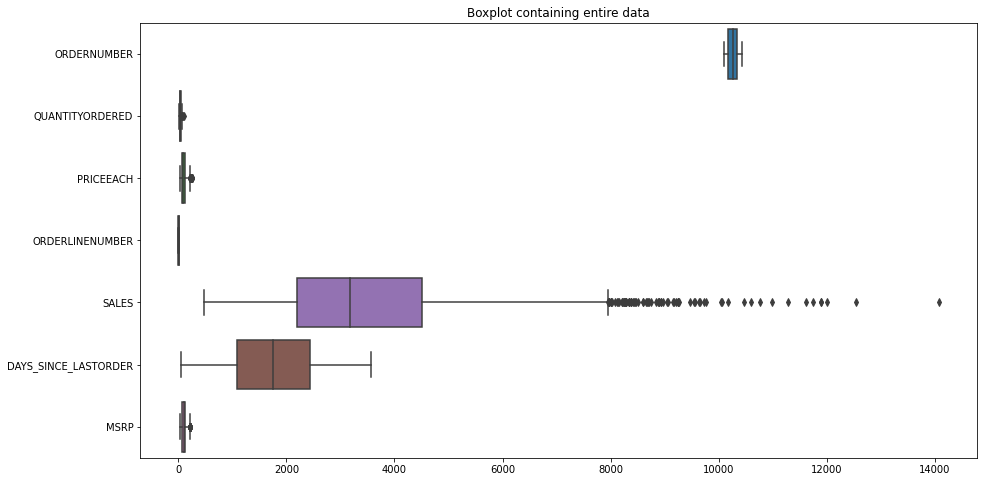

In [74]:
plt.figure(figsize=(15,8))
plt.title("Boxplot containing entire data")
sns.boxplot(data=df,orient="h");

In [75]:
df.skew(axis = 0, skipna = True).sort_values(ascending=False)

SALES                   1.155940
PRICEEACH               0.697222
MSRP                    0.575646
ORDERLINENUMBER         0.575327
QUANTITYORDERED         0.369286
DAYS_SINCE_LASTORDER   -0.002983
ORDERNUMBER            -0.006995
dtype: float64

In [76]:
def univariateAnalysis_numeric(column,nbins):
    print("\nDescription of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    print('\n')

In [77]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

7

In [78]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,7)


Description of ORDERNUMBER
----------------------------------------------------------------------------
count     2747.000000
mean     10259.761558
std         91.877521
min      10100.000000
25%      10181.000000
50%      10264.000000
75%      10334.500000
max      10425.000000
Name: ORDERNUMBER, dtype: float64 


Description of QUANTITYORDERED
----------------------------------------------------------------------------
count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64 


Description of PRICEEACH
----------------------------------------------------------------------------
count    2747.000000
mean      101.098951
std        42.042548
min        26.880000
25%        68.745000
50%        95.550000
75%       127.100000
max       252.870000
Name: PRICEEACH, dtype: float64 


Description of ORDERLINENUMBER
-----------------------------

Interquartile range (IQR) of ORDERNUMBER is  153.5
Lower limit in ORDERNUMBER:  9950.75
Upper limit in ORDERNUMBER:  10564.75




Text(0.5, 1.0, 'Histogram of ORDERNUMBER')

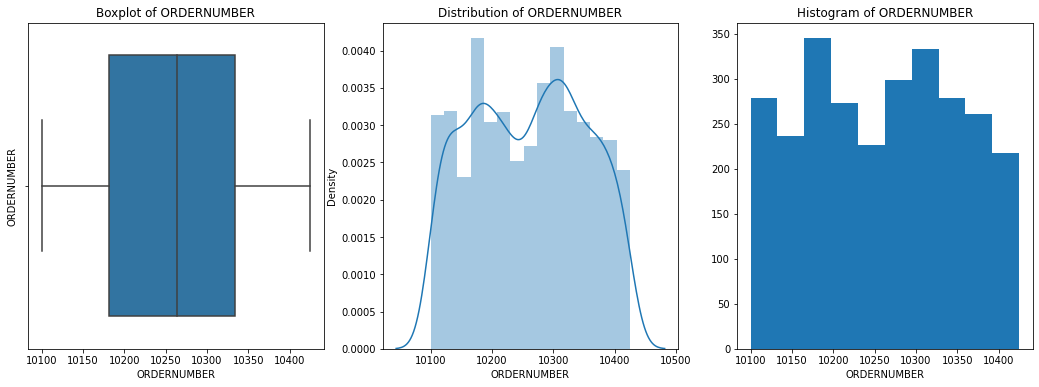

In [79]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=df['ORDERNUMBER'].quantile(q=0.25)
Q3=df['ORDERNUMBER'].quantile(q=0.75)
print('Interquartile range (IQR) of ORDERNUMBER is ', stats.iqr(df['ORDERNUMBER']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in ORDERNUMBER: ', L_outliers)
print('Upper limit in ORDERNUMBER: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='ORDERNUMBER',data=df,orient='v',ax=ax1);
ax1.set_ylabel('ORDERNUMBER')
ax1.set_title('Boxplot of ORDERNUMBER')

#distplot
sns.distplot(df['ORDERNUMBER'],ax=ax2);
ax2.set_xlabel('ORDERNUMBER')
ax2.set_title('Distribution of ORDERNUMBER')

#histogram
ax3.hist(df['ORDERNUMBER']);
ax3.set_xlabel('ORDERNUMBER')
ax3.set_title('Histogram of ORDERNUMBER')

Interquartile range (IQR) of QUANTITYORDERED is  16.0
Lower limit in QUANTITYORDERED:  3.0
Upper limit in QUANTITYORDERED:  67.0




Text(0.5, 1.0, 'Histogram of QUANTITYORDERED')

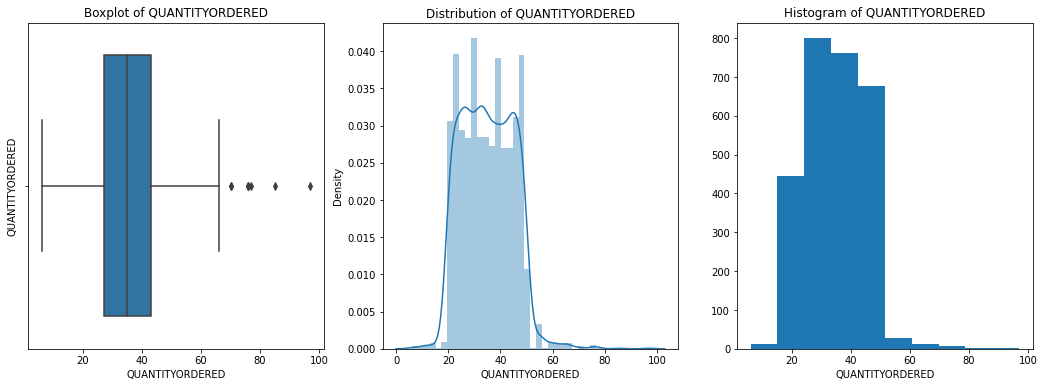

In [80]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=df['QUANTITYORDERED'].quantile(q=0.25)
Q3=df['QUANTITYORDERED'].quantile(q=0.75)
print('Interquartile range (IQR) of QUANTITYORDERED is ', stats.iqr(df['QUANTITYORDERED']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in QUANTITYORDERED: ', L_outliers)
print('Upper limit in QUANTITYORDERED: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='QUANTITYORDERED',data=df,orient='v',ax=ax1);
ax1.set_ylabel('QUANTITYORDERED')
ax1.set_title('Boxplot of QUANTITYORDERED')

#distplot
sns.distplot(df['QUANTITYORDERED'],ax=ax2);
ax2.set_xlabel('QUANTITYORDERED')
ax2.set_title('Distribution of QUANTITYORDERED')

#histogram
ax3.hist(df['QUANTITYORDERED']);
ax3.set_xlabel('QUANTITYORDERED')
ax3.set_title('Histogram of QUANTITYORDERED')

Interquartile range (IQR) of PRICEEACH is  58.35499999999999
Lower limit in PRICEEACH:  -18.78749999999998
Upper limit in PRICEEACH:  214.6325




Text(0.5, 1.0, 'Histogram of PRICEEACH')

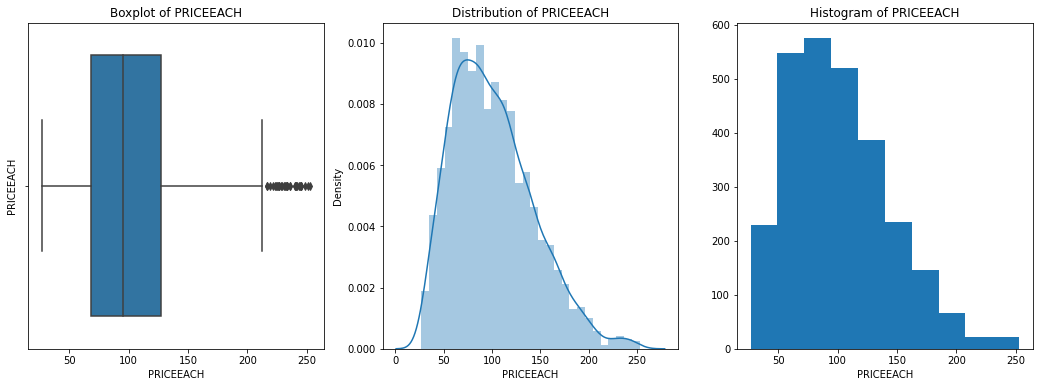

In [81]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=df['PRICEEACH'].quantile(q=0.25)
Q3=df['PRICEEACH'].quantile(q=0.75)
print('Interquartile range (IQR) of PRICEEACH is ', stats.iqr(df['PRICEEACH']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in PRICEEACH: ', L_outliers)
print('Upper limit in PRICEEACH: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='PRICEEACH',data=df,orient='v',ax=ax1);
ax1.set_ylabel('PRICEEACH')
ax1.set_title('Boxplot of PRICEEACH')

#distplot
sns.distplot(df['PRICEEACH'],ax=ax2);
ax2.set_xlabel('PRICEEACH')
ax2.set_title('Distribution of PRICEEACH')

#histogram
ax3.hist(df['PRICEEACH']);
ax3.set_xlabel('PRICEEACH')
ax3.set_title('Histogram of PRICEEACH')

Interquartile range (IQR) of ORDERLINENUMBER is  6.0
Lower limit in ORDERLINENUMBER:  -6.0
Upper limit in ORDERLINENUMBER:  18.0




Text(0.5, 1.0, 'Histogram of ORDERLINENUMBER')

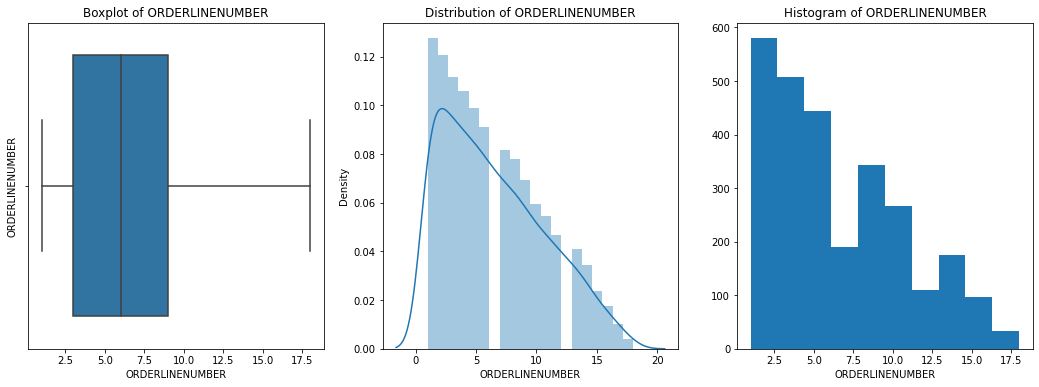

In [82]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=df['ORDERLINENUMBER'].quantile(q=0.25)
Q3=df['ORDERLINENUMBER'].quantile(q=0.75)
print('Interquartile range (IQR) of ORDERLINENUMBER is ', stats.iqr(df['ORDERLINENUMBER']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in ORDERLINENUMBER: ', L_outliers)
print('Upper limit in ORDERLINENUMBER: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='ORDERLINENUMBER',data=df,orient='v',ax=ax1);
ax1.set_ylabel('ORDERLINENUMBER')
ax1.set_title('Boxplot of ORDERLINENUMBER')

#distplot
sns.distplot(df['ORDERLINENUMBER'],ax=ax2);
ax2.set_xlabel('ORDERLINENUMBER')
ax2.set_title('Distribution of ORDERLINENUMBER')

#histogram
ax3.hist(df['ORDERLINENUMBER']);
ax3.set_xlabel('ORDERLINENUMBER')
ax3.set_title('Histogram of ORDERLINENUMBER')

Interquartile range (IQR) of SALES is  2298.7449999999994
Lower limit in SALES:  -1243.7674999999995
Upper limit in SALES:  7951.212499999999




Text(0.5, 1.0, 'Histogram of SALES')

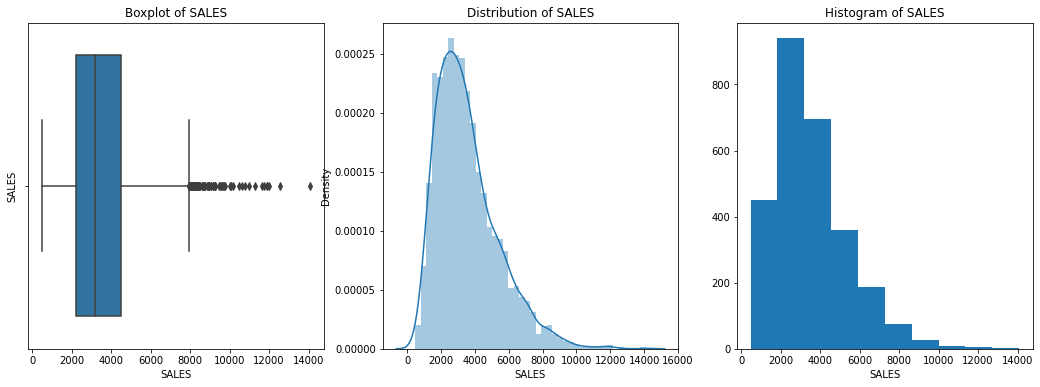

In [83]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=df['SALES'].quantile(q=0.25)
Q3=df['SALES'].quantile(q=0.75)
print('Interquartile range (IQR) of SALES is ', stats.iqr(df['SALES']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in SALES: ', L_outliers)
print('Upper limit in SALES: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='SALES',data=df,orient='v',ax=ax1);
ax1.set_ylabel('SALES')
ax1.set_title('Boxplot of SALES')

#distplot
sns.distplot(df['SALES'],ax=ax2);
ax2.set_xlabel('SALES')
ax2.set_title('Distribution of SALES')

#histogram
ax3.hist(df['SALES']);
ax3.set_xlabel('SALES')
ax3.set_title('Histogram of SALES')

Interquartile range (IQR) of DAYS_SINCE_LASTORDER is  1359.5
Lower limit in DAYS_SINCE_LASTORDER:  -962.25
Upper limit in DAYS_SINCE_LASTORDER:  4475.75




Text(0.5, 1.0, 'Histogram of DAYS_SINCE_LASTORDER')

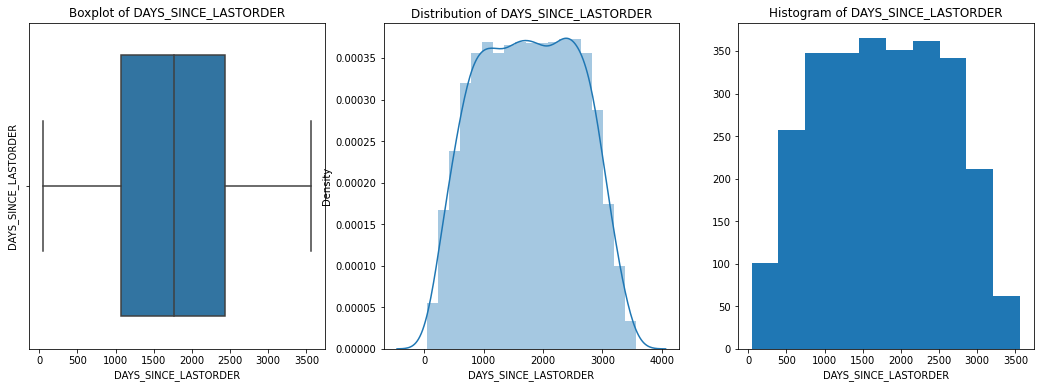

In [84]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=df['DAYS_SINCE_LASTORDER'].quantile(q=0.25)
Q3=df['DAYS_SINCE_LASTORDER'].quantile(q=0.75)
print('Interquartile range (IQR) of DAYS_SINCE_LASTORDER is ', stats.iqr(df['DAYS_SINCE_LASTORDER']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in DAYS_SINCE_LASTORDER: ', L_outliers)
print('Upper limit in DAYS_SINCE_LASTORDER: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='DAYS_SINCE_LASTORDER',data=df,orient='v',ax=ax1);
ax1.set_ylabel('DAYS_SINCE_LASTORDER')
ax1.set_title('Boxplot of DAYS_SINCE_LASTORDER')

#distplot
sns.distplot(df['DAYS_SINCE_LASTORDER'],ax=ax2);
ax2.set_xlabel('DAYS_SINCE_LASTORDER')
ax2.set_title('Distribution of DAYS_SINCE_LASTORDER')

#histogram
ax3.hist(df['DAYS_SINCE_LASTORDER']);
ax3.set_xlabel('DAYS_SINCE_LASTORDER')
ax3.set_title('Histogram of DAYS_SINCE_LASTORDER')

Interquartile range (IQR) of MSRP is  56.0
Lower limit in MSRP:  -16.0
Upper limit in MSRP:  208.0




Text(0.5, 1.0, 'Histogram of MSRP')

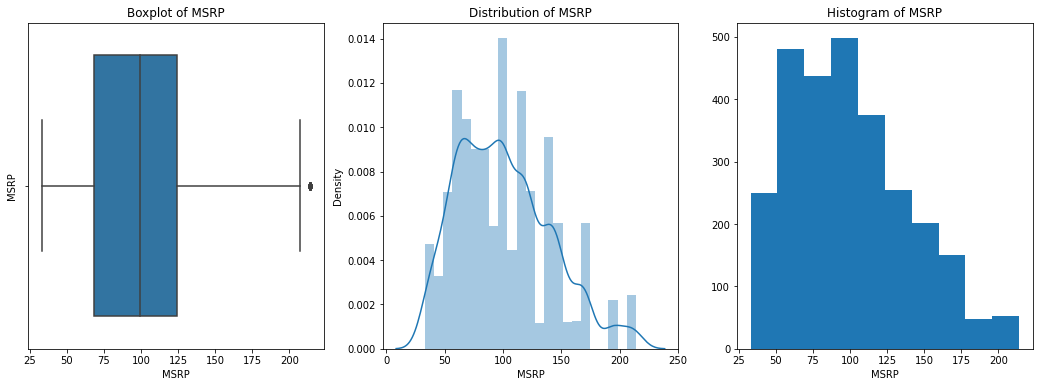

In [85]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=df['MSRP'].quantile(q=0.25)
Q3=df['MSRP'].quantile(q=0.75)
print('Interquartile range (IQR) of MSRP is ', stats.iqr(df['MSRP']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in MSRP: ', L_outliers)
print('Upper limit in MSRP: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='MSRP',data=df,orient='v',ax=ax1);
ax1.set_ylabel('MSRP')
ax1.set_title('Boxplot of MSRP')

#distplot
sns.distplot(df['MSRP'],ax=ax2);
ax2.set_xlabel('MSRP')
ax2.set_title('Distribution of MSRP')

#histogram
ax3.hist(df['MSRP']);
ax3.set_xlabel('MSRP')
ax3.set_title('Histogram of MSRP')

Bivariate Analysis

In [89]:
corr = df_num.corr(method='pearson')
corr

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
ORDERNUMBER,1.000000,0.067110,-0.003369,-0.054300,0.037289,-0.251476,-0.013910
QUANTITYORDERED,0.067110,1.000000,0.010161,-0.016295,0.553359,-0.021923,0.020551
PRICEEACH,-0.003369,0.010161,1.000000,-0.052646,0.808287,-0.397092,0.778393
ORDERLINENUMBER,-0.054300,-0.016295,-0.052646,1.000000,-0.057414,0.046615,-0.020956
SALES,0.037289,0.553359,0.808287,-0.057414,1.000000,-0.334274,0.634849
DAYS_SINCE_LASTORDER,-0.251476,-0.021923,-0.397092,0.046615,-0.334274,1.000000,-0.524285
MSRP,-0.013910,0.020551,0.778393,-0.020956,0.634849,-0.524285,1.000000


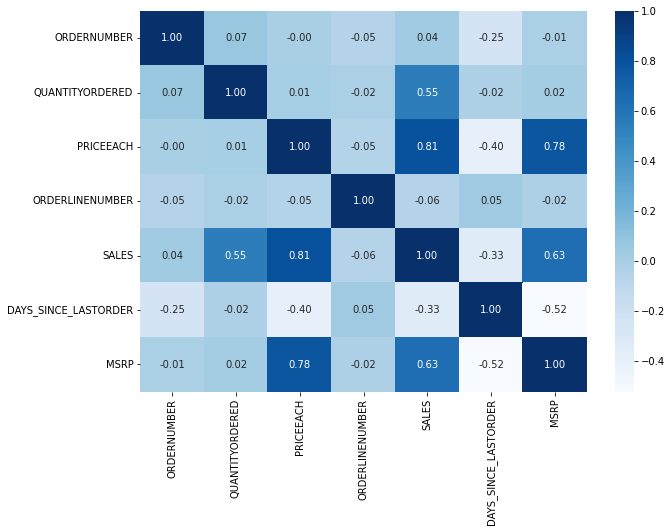

In [90]:
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt = '.2f', cmap="Blues")

Multivariate Analysis

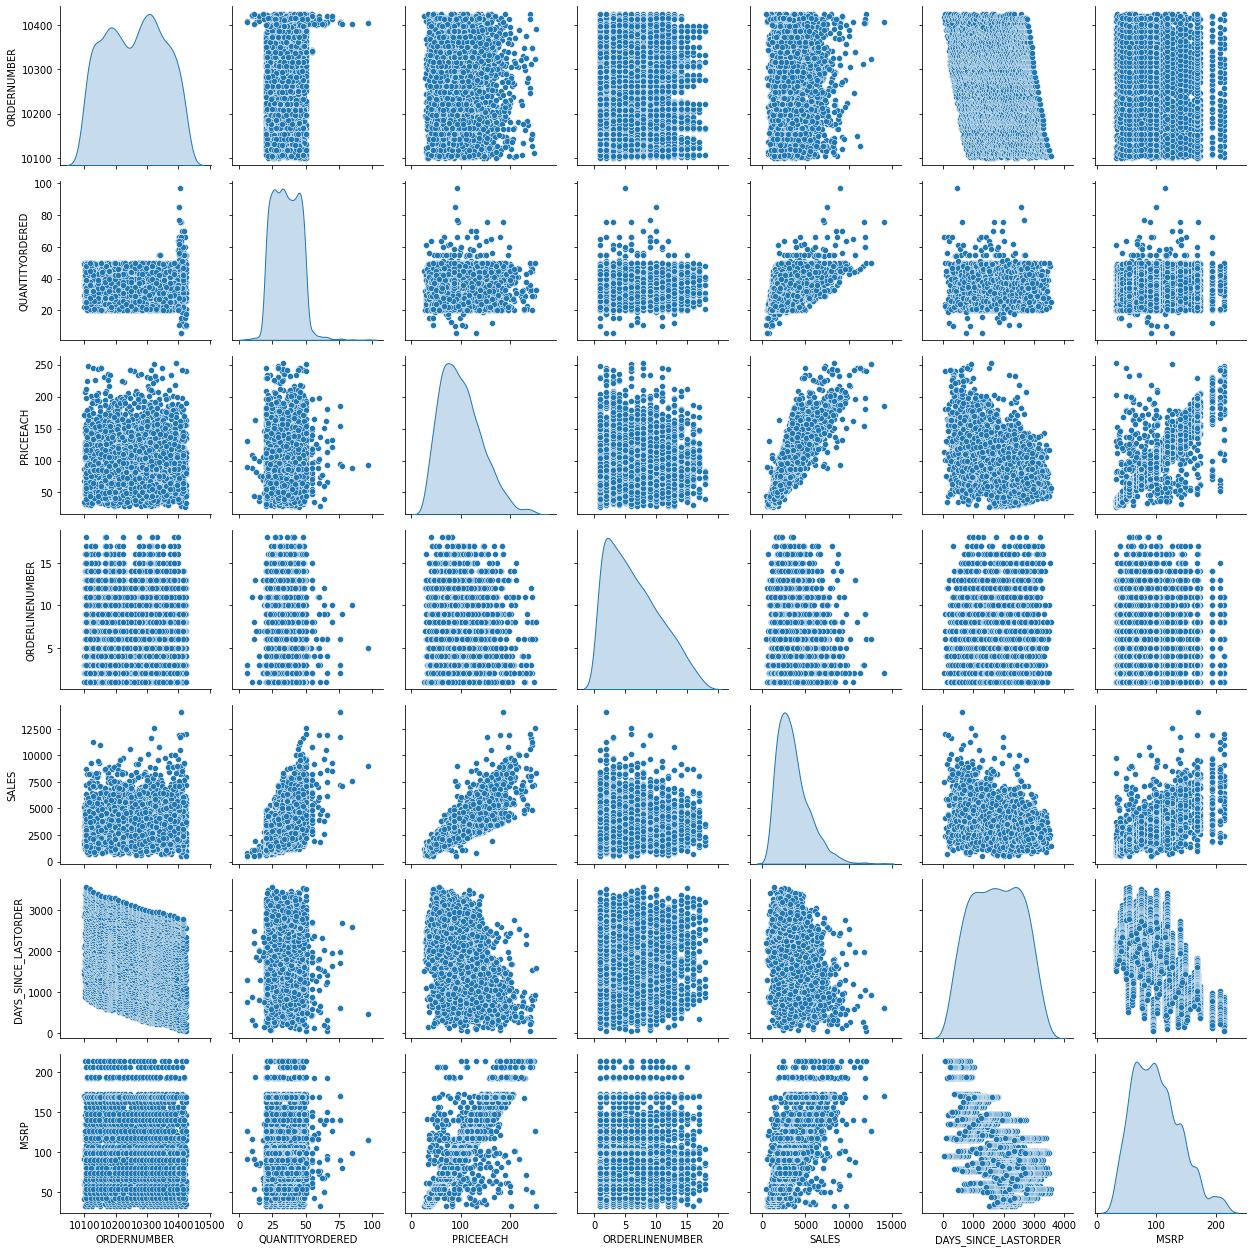

In [91]:
sns.pairplot(df, diag_kind='kde')
plt.tight_layout()

RFM Analysis

In [92]:
from google.colab import files
uploaded = files.upload()

Saving Sales Data RFM Analysis.xlsx to Sales Data RFM Analysis (1).xlsx


In [93]:
df_rfm = pd.read_excel("Sales Data RFM Analysis.xlsx")

In [94]:
df_rfm.head()

,CUSTOMERNAME,First*(ORDERNUMBER),Count*(QUANTITYORDERED),Mean(PRICEEACH),Sum(SALES),Max(ORDERDATE),First*(DAYS_SINCE_LASTORDER),First(ORDERDATE),Recency,Frequency,Monetary,Recency [Binned],Frequency [Binned],Monetary [Binned],RFM Score
0,Euro Shopping Channel,10417.0,259.0,97.383205,912294.11,2020-05-31,42.0,2020-05-13,18.0,259.0,912294.11,4.0,4.0,4.0,444.0
1,"Anna's Decorations, Ltd",10391.0,46.0,106.424130,153996.13,2020-03-09,131.0,2020-03-09,0.0,46.0,153996.13,4.0,4.0,4.0,444.0
2,Online Diecast Creations Co.,10322.0,34.0,108.302059,131685.30,2019-11-04,253.0,2019-11-04,0.0,34.0,131685.30,4.0,4.0,4.0,444.0
3,"UK Collectables, Ltd.",10403.0,29.0,108.535517,118008.27,2020-04-08,76.0,2020-04-08,0.0,29.0,118008.27,4.0,3.0,3.0,433.0
4,Suominen Souveniers,10363.0,30.0,110.405000,113961.15,2020-01-06,317.0,2020-01-06,0.0,30.0,113961.15,4.0,3.0,3.0,433.0


In [95]:
df_rfm.tail()

,CUSTOMERNAME,First*(ORDERNUMBER),Count*(QUANTITYORDERED),Mean(PRICEEACH),Sum(SALES),Max(ORDERDATE),First*(DAYS_SINCE_LASTORDER),First(ORDERDATE),Recency,Frequency,Monetary,Recency [Binned],Frequency [Binned],Monetary [Binned],RFM Score
84,Alpha Cognac,10178.0,20.0,101.160000,70488.44,2020-03-28,675.0,2018-11-08,506.0,20.0,70488.44,1.0,1.0,1.0,111.0
85,"Australian Gift Network, Co",10174.0,15.0,110.554000,59469.12,2020-02-02,603.0,2018-11-06,453.0,15.0,59469.12,1.0,1.0,1.0,111.0
86,Gift Ideas Corp.,10131.0,19.0,87.600000,57294.42,2019-12-04,1244.0,2018-06-16,536.0,19.0,57294.42,1.0,1.0,1.0,111.0
87,Mini Auto Werke,10164.0,15.0,98.083333,52263.90,2020-03-10,717.0,2018-10-21,506.0,15.0,52263.90,1.0,1.0,1.0,111.0
88,Auto-Moto Classics Inc.,10130.0,8.0,92.800000,26479.26,2019-12-03,1615.0,2018-06-16,535.0,8.0,26479.26,1.0,1.0,1.0,111.0


In [96]:
df_analysis = df_rfm.copy()

In [97]:
df_analysis = df_analysis.drop(['First*(ORDERNUMBER)', 'Count*(QUANTITYORDERED)', 'Mean(PRICEEACH)', 'Sum(SALES)', 'Max(ORDERDATE)', 'First*(DAYS_SINCE_LASTORDER)', 'First(ORDERDATE)', 'Recency', 'Frequency', 'Monetary', 'Recency [Binned]', 'Frequency [Binned]', 'Monetary [Binned]'],axis=1)

In [98]:
df_analysis.head()

,CUSTOMERNAME,RFM Score
0,Euro Shopping Channel,444.0
1,"Anna's Decorations, Ltd",444.0
2,Online Diecast Creations Co.,444.0
3,"UK Collectables, Ltd.",433.0
4,Suominen Souveniers,433.0


Best Customers

In [99]:
best = df_analysis.loc[df_analysis['RFM Score'].isin([444, 344])]
best.head(7)

,CUSTOMERNAME,RFM Score
0,Euro Shopping Channel,444.0
1,"Anna's Decorations, Ltd",444.0
2,Online Diecast Creations Co.,444.0
23,The Sharp Gifts Warehouse,344.0
24,"AV Stores, Co.",344.0
25,Souveniers And Things Co.,344.0
26,Salzburg Collectables,344.0


Customers on the Verge of Churning

In [100]:
churn = df_analysis.loc[df_analysis['RFM Score'].isin([333, 323, 233, 223, 222])]
churn.head(7)

,CUSTOMERNAME,RFM Score
30,"Vida Sport, Ltd",333.0
31,Baane Mini Imports,333.0
32,"Toys of Finland, Co.",333.0
33,Marta's Replicas Co.,333.0
35,Amica Models & Co.,323.0
36,Vitachrome Inc.,323.0
51,"Tokyo Collectables, Ltd",233.0


Lost Customers

In [101]:
lost = df_analysis.loc[df_analysis['RFM Score'].isin([122, 121, 112, 111])]
lost.head(7)

,CUSTOMERNAME,RFM Score
80,Marseille Mini Autos,122.0
81,"Australian Collectables, Ltd",121.0
82,Lyon Souveniers,112.0
83,"Volvo Model Replicas, Co",112.0
84,Alpha Cognac,111.0
85,"Australian Gift Network, Co",111.0
86,Gift Ideas Corp.,111.0


Loyal Customers

In [63]:
loyal = df_analysis.loc[df_analysis['RFM Score'].isin([444, 433, 344, 334])]
loyal.head(7)

,CUSTOMERNAME,RFM Score
0,Euro Shopping Channel,444.0
1,"Anna's Decorations, Ltd",444.0
2,Online Diecast Creations Co.,444.0
3,"UK Collectables, Ltd.",433.0
4,Suominen Souveniers,433.0
5,"Oulu Toy Supplies, Inc.",433.0
6,Heintze Collectables,433.0
